In [67]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [1]:
# 경로 변수 (고정)


trainfile = '../_data/train_03_997.csv'
old_trainfile = '../_data/train.csv'
kaggle_trainfile = '../_data/train_k.csv'

testfile = '../_data/test_clean.csv'
old_testfile = '../_data/test.csv'

train_171016 = '../_data/171016_dow_hr_pas_L2_dur_only.csv'
train_osrm = '../_data/train_with_osrm.csv'
train_osrm_weather = '../_data/train_with_osrm_and_weather.csv'
train_osrm_weather_hourly = '../_data/train_with_osrm_and_weather_hourly.csv'
train_dropped_nan_fixed = '../_data/train__dropped__no_disaster_nan_fixed.csv'
train_added_airps = '../_data/train__dropped__lnglat_saved__airports__no_disaster.csv'
train_added_airps_cleaned = '../_data/train__dropped__cleaned__airports__no_disaster.csv'
train_added_airps_disas_cleaned = '../_data/train__dropped__cleaned__eval__airports__disaster.csv'
train_added_weekhr = '../_data/train__dropped__cleaned__eval__a_d_weekhour.csv'
train_added_manh = '../_data/train__dropped__air_bliz_weekhr_manh.csv'
train_all_vars_rough = '../_data/train__all_vars__rough.csv'

train_701778_all_vars = '../_data/train__701778__all_vars.csv'
train_700806_all_vars_cooks_dropped = '../_data/train_700806_dropped_cooks.csv'
train_700789_all_vars_cooks_dropped_circle_filter = '../_data/train_700789_dropped_cooks__circle_filter.csv'
train_700789_all_vars_cdcf_kmeans = '../_data/train_kmeans_30_added.csv'
train_700419_all_vars_cdcf150kmh_km60 = '../_data/train_kmeans_60_added_cooksd_circle_150kmh.csv'

train_700419_all_vars_4d_clust120 = '../_data/train_kmeans_4D_120.csv'
train_700419_all_vars_4d_clust120_speed = '../_data/train_kmeans_4D_120_clustspeed.csv'
train_700419_all_vars_4d_clust120_speed_glob = '../_data/train_kmeans_4D_120_clustspeed_globalized.csv'

train_700419 = '../_data/train_700419_recent.csv'
train_697355 = '../_data/train_697355_rsq_0722.csv'
train_697349 = '../_data/train_697349_rsq_0723.csv'
train_697284 = '../_data/train_697284_rsq_0725.csv'
train_696688 = '../_data/train_696688_rsq_0731.csv'

test_recent = '../_data/test_backup_clean_todo_clust.csv'

trains = [train_700419, train_697355, train_697349, train_697284, train_696688]

train_latest = trains[0]



In [2]:
pd.options.display.max_columns = 40

```
attempt k-means
```

In [4]:
# train_with_osrm_and_weather.csv
df_train = pd.read_csv(dataLoc + train_latest)
df_train.head()

,is_hol,blizz,m_d,dow,hr,wkhr,L2,pas_cnt,p_JFK,p_LGA,...,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,0.069424,1,False,False,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,0.057791,1,False,False,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,0.066698,2,False,False,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,0.018223,1,False,False,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,0.027198,1,False,False,...,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [6]:
df_train.head()


,is_hol,blizz,m_d,dow,hr,wkhr,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [7]:
df_copy = df_train.copy()

In [8]:
df_copy.insert(16, 'avg_spd', df_copy['total_dist'] / df_copy['dur'])

In [10]:
df_copy['avg_spd'] = 3.6 * df_copy['avg_spd']
df_copy.head()

,is_hol,blizz,m_d,dow,hr,wkhr,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,False,0,430,Saturday,23,143,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,False,0,430,Saturday,23,143,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,False,0,430,Saturday,23,143,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,False,0,430,Saturday,23,143,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,False,0,430,Saturday,23,143,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [12]:
df_copy.drop(df_copy.loc[df_copy['avg_spd'] > 150, 'avg_spd'].index, inplace=True)

In [13]:
df_copy.shape

(700419, 31)

In [14]:
df_copy.to_csv('../_data/train_700419_cooks_circle_150kmh__no_clust.csv')

In [3]:
train_latest = '../_data/train_700419_cooks_circle_150kmh__no_clust.csv'

In [3]:
# train_with_osrm_and_weather.csv
df_train = pd.read_csv(train_latest,\
                       usecols=['p_lng', 'p_lat', 'd_lng', 'd_lat'])
df_train.head()

,p_lng,p_lat,d_lng,d_lat
0,-73.987793,40.724792,-73.975616,40.656445
1,-73.957596,40.717770,-73.951424,40.775230
2,-74.000954,40.742031,-73.947708,40.782200
3,-73.985733,40.738258,-73.993179,40.754890
4,-74.006615,40.740650,-73.985619,40.723362


In [5]:
df_test = pd.read_csv(test_recent, usecols=['p_lng', 'p_lat', 'd_lng', 'd_lat'])
df_test.head()

,p_lng,p_lat,d_lng,d_lat
0,-73.998291,40.722618,-73.971779,40.762470
1,-73.955109,40.689564,-73.978203,40.685802
2,-73.978416,40.791576,-73.973160,40.675968
3,-73.873093,40.774097,-73.926704,40.856739
4,-73.979416,40.755211,-74.003548,40.738224


In [6]:
df_test.loc[(31 < df_test['d_lat'])\
             &(df_test['d_lat'] < 40), :]

,p_lng,p_lat,d_lng,d_lat
159419,-73.980751,40.757111,-74.240051,38.478298
216662,-75.524620,39.441147,-75.524620,39.441147
237041,-77.039436,38.898849,-77.039436,38.898849


In [7]:
df_test.loc[(31 < df_test['p_lat'])\
             &(df_test['p_lat'] < 40), :]

,p_lng,p_lat,d_lng,d_lat
216662,-75.524620,39.441147,-75.524620,39.441147
237041,-77.039436,38.898849,-77.039436,38.898849


In [8]:
for col in df_test.columns:
    print(col)
    print(" min = {}".format(np.percentile(df_test[col], 0)))
    print(" 0.3 = {}".format(np.percentile(df_test[col], 0.3)))
    print("99.7 = {}".format(np.percentile(df_test[col], 99.7)))
    print(" max = {}".format(np.percentile(df_test[col], 100)))

p_lng
 min = -77.03943634
 0.3 = -74.01622009
99.7 = -73.77685547
 max = -70.51190186
p_lat
 min = 38.89884949
 0.3 = 40.64348221
99.7 = 40.825418273
 max = 51.88108444
d_lng
 min = -79.33869934
 0.3 = -74.04951388655999
99.7 = -73.77672873044
 max = -70.51190186
d_lat
 min = 38.47829819
 0.3 = 40.63052003092
99.7 = 40.86694950784
 max = 43.91176224


In [18]:
df_train.shape, df_test.shape

((700419, 4), (346797, 4))

In [11]:
df_copy = pd.concat([df_train, df_test])

In [14]:
df_copy.head()

,p_lng,p_lat,d_lng,d_lat
0,-73.987793,40.724792,-73.975616,40.656445
1,-73.957596,40.717770,-73.951424,40.775230
2,-74.000954,40.742031,-73.947708,40.782200
3,-73.985733,40.738258,-73.993179,40.754890
4,-74.006615,40.740650,-73.985619,40.723362


In [15]:
df_copy[['p_lat', 'p_lng']]

,p_lat,p_lng
0,40.724792,-73.987793
1,40.717770,-73.957596
2,40.742031,-74.000954
3,40.738258,-73.985733
4,40.740650,-74.006615
5,40.719234,-73.997253
6,40.753037,-73.994537
7,40.774086,-73.873055
8,40.780540,-73.980354
9,40.644691,-73.782448


## KMeans (n=80) pickup / train AND test

In [16]:
pickup_coords = df_copy[['p_lat', 'p_lng']].copy()

In [19]:
from sklearn.cluster import KMeans
from datetime import datetime

t0 = datetime.now()
print(t0)

pickup_coords = df_copy[['p_lat', 'p_lng']].copy()
kmeans = KMeans(n_clusters=80)

kmeans.fit(pickup_coords)

y_kmeans = kmeans.predict(pickup_coords)

t1 = datetime.now()

print(t1-t0)

2017-10-24 19:24:46.587571
0:10:42.739679


In [45]:
(40.896-40.598)*1.6+-74.09

-73.6132

In [2]:
df_y = pd.read_csv('../_data/kmeans_30_backup.csv')

C:\Users\jchoi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
yd = df_y.iloc[1:, 0].copy()
yd.head()

1    16
2    17
3    17
4    19
5    26
Name: 30, dtype: object

In [7]:
yd.rename('d')

1         16
2         17
3         17
4         19
5         26
6         19
7         12
8          0
9         18
10        29
11         6
12         0
13         0
14        26
15        17
16        20
17         7
18         0
19        14
20         3
21         7
22         6
23        26
24        21
25        13
26        20
27        20
28        29
29        17
30        26
          ..
700760    11
700761     0
700762     5
700763    26
700764    20
700765     5
700766    11
700767     3
700768    22
700769    21
700770    17
700771    17
700772     3
700773    26
700774    14
700775    17
700776    21
700777     1
700778    20
700779    12
700780    21
700781     0
700782     7
700783     5
700784     7
700785    19
700786     7
700787    11
700788    18
700789     3
Name: d, Length: 700789, dtype: object

In [8]:
yp = df_y.iloc[1:, 1].copy()
yp.rename('p')
yp.head()

1    14
2    17
3     1
4    28
5     1
Name: 30.1, dtype: object

In [10]:
from datetime import datetime

In [19]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          

In [22]:
yp = y_kmeans.copy()

In [21]:
y_kmeans[:10]

array([19, 11, 38, 35, 14, 58, 73,  3, 15,  2])

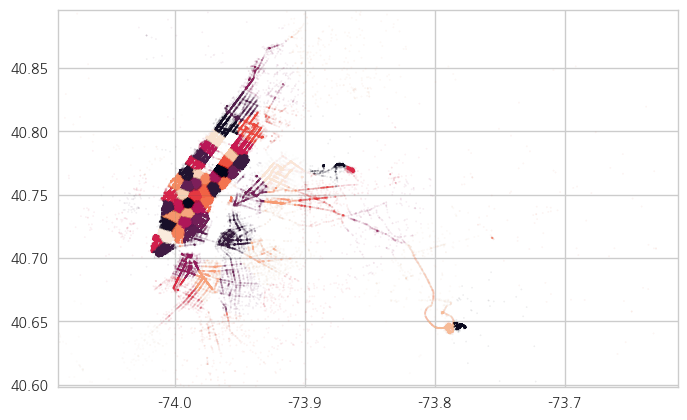

0:00:27.278436


In [20]:
t0 = datetime.now()


plt.scatter(pickup_coords.iloc[:, 1], pickup_coords.iloc[:, 0],\
            c=y_kmeans, s=1, alpha=0.05)

plt.xlim(-74.090, -73.613)
plt.ylim(40.598, 40.896)

plt.show()


t1 = datetime.now()
print(t1-t0)

In [56]:
y_dict = dict()
y_dict[(30, 'p')] = y_kmeans

In [76]:
y_dict[(30, 'd')] = y_kmeans

In [14]:
ylist = [yp]

In [15]:
ylist

[array([38, 11,  9, ..., 59, 38, 21])]

In [79]:
df_y = pd.DataFrame(y_dict)
df_y.shape

(700789, 2)

In [80]:
df_y.to_csv('../_data/kmeans_30_backup.csv', index=False)

## KMeans (n=80) dropoff train AND test

In [23]:
dropoff_coords = df_copy[['d_lat', 'd_lng']].copy()

In [24]:
from sklearn.cluster import KMeans
from datetime import datetime

t0 = datetime.now()
print(t0)

dropoff_coords = df_copy[['d_lat', 'd_lng']].copy()
kmeans = KMeans(n_clusters=80)

kmeans.fit(dropoff_coords)

y_kmeans = kmeans.predict(dropoff_coords)

t1 = datetime.now()

print(t1-t0)

2017-10-24 19:40:46.488959
0:15:17.832704


In [45]:
(40.896-40.598)*1.6+-74.09

-73.6132

In [25]:
y_kmeans[:5]

array([59,  0, 63, 55, 79])

In [26]:
yd = y_kmeans.copy()

In [25]:
df_y = pd.concat([pd.Series(yp), pd.Series(yd)], axis=1)
df_y.head()

,0,1
0,38,11
1,11,20
2,9,2
3,5,34
4,9,50


In [72]:
df_y.iloc[700419:700422, 0]

700419    58
700420    22
700421    36
Name: 0, dtype: int32

In [26]:
df_y.to_csv('../_data/kmeans_60_backup.csv', index=False)


2017-10-24 20:03:06.035240


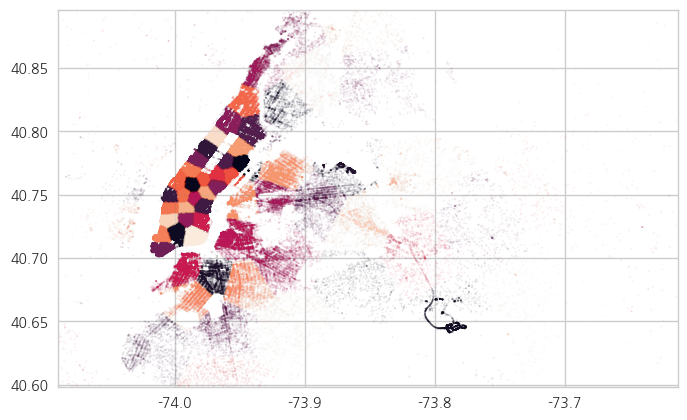

0:00:25.643170


In [27]:
t0 = datetime.now()
print(t0)

plt.scatter(dropoff_coords.iloc[:, 1], dropoff_coords.iloc[:, 0],\
            c=yd, s=1, alpha=0.05)

plt.xlim(-74.090, -73.613)
plt.ylim(40.598, 40.896)

plt.show()


t1 = datetime.now()
print(t1-t0)

In [28]:
yk = [yp, yd]

In [30]:
len(yp), len(yd)

(1047216, 1047216)

In [31]:
df_copy.shape

(1047216, 4)

In [42]:
df_y = pd.concat([pd.Series(yp), pd.Series(yd)], axis=1)

In [45]:
yd

array([59,  0, 63, ..., 76, 10, 40])

In [43]:
df_y

,0,1
0,19,59
1,11,0
2,38,63
3,35,55
4,14,79
5,58,53
6,73,6
7,3,56
8,15,31
9,2,34


In [47]:
df_train = pd.read_csv('../_data/train_700419_recent.csv')
df_train.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,p_clust_60,d_clust_60,trip_clust_120,new_clust_spd,clust_spd,clust_spd120,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0,430,Saturday,23,143,38,11,17,22.351081,22.351081,22.452301,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,0.0,False,0,430,Saturday,23,143,11,20,14,26.168973,26.168973,20.823821,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,0.0,False,0,430,Saturday,23,143,9,2,14,24.123125,24.123125,20.823821,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,0.0,False,0,430,Saturday,23,143,5,34,81,15.370883,15.370883,13.819989,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,0.0,False,0,430,Saturday,23,143,9,50,25,13.602766,13.602766,13.197215,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [48]:
df_train2 = df_train.copy()

In [55]:
del df_train2['trip_clust_120']

In [56]:
df_train2.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0,430,Saturday,23,143,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,0.0,False,0,430,Saturday,23,143,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,0.0,False,0,430,Saturday,23,143,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,0.0,False,0,430,Saturday,23,143,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,0.0,False,0,430,Saturday,23,143,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [57]:
df_train2.insert(7, 'p_clust', df_y.iloc[:700419, 0])

In [58]:
df_train2.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0,430,Saturday,23,143,19,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,0.0,False,0,430,Saturday,23,143,11,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,0.0,False,0,430,Saturday,23,143,38,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,0.0,False,0,430,Saturday,23,143,35,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,0.0,False,0,430,Saturday,23,143,14,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [59]:
df_train2.insert(8, 'd_clust', df_y.iloc[:700419, 1])

In [60]:
df_train2.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0,430,Saturday,23,143,19,59,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,0.0,False,0,430,Saturday,23,143,11,0,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,0.0,False,0,430,Saturday,23,143,38,63,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,0.0,False,0,430,Saturday,23,143,35,55,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,0.0,False,0,430,Saturday,23,143,14,79,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [61]:
df_test0 = pd.read_csv(test_recent)
df_test0.head()

,didnt_move,date,is_hol,m_d,dow,hr,p_JFK,p_LGA,d_JFK,d_LGA,pas_cnt,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip
0,0.0,2016-06-30,False,630,Thursday,23,False,False,False,False,5,-73.998291,40.722618,-73.971779,40.762470,5280.3,623.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
1,0.0,2016-06-30,False,630,Thursday,23,False,False,False,False,2,-73.955109,40.689564,-73.978203,40.685802,2573.5,219.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
2,0.0,2016-06-30,False,630,Thursday,23,False,False,False,False,1,-73.978416,40.791576,-73.973160,40.675968,15048.8,1300.0,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
3,0.0,2016-06-30,False,630,Thursday,23,False,True,False,False,2,-73.873093,40.774097,-73.926704,40.856739,16818.3,1029.1,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
4,0.0,2016-06-30,False,630,Thursday,23,False,False,False,False,1,-73.979416,40.755211,-74.003548,40.738224,3536.7,434.5,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0


In [68]:
df_test2 = df_test0.copy()

In [67]:
df_y.iloc[700419:,0]

700419     58
700420     22
700421     36
700422      3
700423     53
700424     50
700425     33
700426     73
700427     46
700428     34
700429     19
700430     35
700431     46
700432     62
700433     33
700434     42
700435     25
700436     79
700437     19
700438     36
700439     11
700440     35
700441     53
700442     59
700443     34
700444     19
700445      2
700446     65
700447      1
700448     46
           ..
1047186     9
1047187     4
1047188     9
1047189    69
1047190    73
1047191    35
1047192     5
1047193    62
1047194     1
1047195    55
1047196    73
1047197     4
1047198    25
1047199    34
1047200    11
1047201    13
1047202     3
1047203    35
1047204    38
1047205    41
1047206    73
1047207    40
1047208    19
1047209     2
1047210    25
1047211    19
1047212    23
1047213    36
1047214    59
1047215    58
Name: 0, Length: 346797, dtype: int32

In [70]:
df_test2.insert(6, 'p_clust', df_y.iloc[700419:, 0].tolist())

In [71]:
df_test2.head()

,didnt_move,date,is_hol,m_d,dow,hr,p_clust,p_JFK,p_LGA,d_JFK,d_LGA,pas_cnt,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip
0,0.0,2016-06-30,False,630,Thursday,23,58,False,False,False,False,5,-73.998291,40.722618,-73.971779,40.762470,5280.3,623.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
1,0.0,2016-06-30,False,630,Thursday,23,22,False,False,False,False,2,-73.955109,40.689564,-73.978203,40.685802,2573.5,219.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
2,0.0,2016-06-30,False,630,Thursday,23,36,False,False,False,False,1,-73.978416,40.791576,-73.973160,40.675968,15048.8,1300.0,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
3,0.0,2016-06-30,False,630,Thursday,23,3,False,True,False,False,2,-73.873093,40.774097,-73.926704,40.856739,16818.3,1029.1,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
4,0.0,2016-06-30,False,630,Thursday,23,53,False,False,False,False,1,-73.979416,40.755211,-74.003548,40.738224,3536.7,434.5,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0


In [74]:
df_test2.insert(7, 'd_clust', df_y.iloc[700419:, 1].tolist())

In [75]:
df_test2.head()

,didnt_move,date,is_hol,m_d,dow,hr,p_clust,d_clust,p_JFK,p_LGA,d_JFK,d_LGA,pas_cnt,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip
0,0.0,2016-06-30,False,630,Thursday,23,58,45,False,False,False,False,5,-73.998291,40.722618,-73.971779,40.762470,5280.3,623.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
1,0.0,2016-06-30,False,630,Thursday,23,22,6,False,False,False,False,2,-73.955109,40.689564,-73.978203,40.685802,2573.5,219.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
2,0.0,2016-06-30,False,630,Thursday,23,36,6,False,False,False,False,1,-73.978416,40.791576,-73.973160,40.675968,15048.8,1300.0,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
3,0.0,2016-06-30,False,630,Thursday,23,3,31,False,True,False,False,2,-73.873093,40.774097,-73.926704,40.856739,16818.3,1029.1,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0
4,0.0,2016-06-30,False,630,Thursday,23,53,56,False,False,False,False,1,-73.979416,40.755211,-74.003548,40.738224,3536.7,434.5,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0


In [76]:
df_test2.isnull().sum()

didnt_move       0
date             0
is_hol           0
m_d              0
dow              0
hr               0
p_clust          0
d_clust          0
p_JFK            0
p_LGA            0
d_JFK            0
d_LGA            0
pas_cnt          0
p_lng            0
p_lat            0
d_lng            0
d_lat            0
total_dist       0
total_time       0
day_max_temp     0
day_min_temp     0
day_rainfall     0
day_snowfall     0
day_snowdepth    0
hr_temp          0
hr_humid         0
hr_dewpt         0
hr_windspeed     0
hr_gustspeed     0
hr_precip        0
dtype: int64

In [77]:
df_train2.isnull().sum()

didnt_move       0
is_hol           0
blizz            0
m_d              0
dow              0
hr               0
wkhr             0
p_clust          0
d_clust          0
L2               0
pas_cnt          0
p_JFK            0
p_LGA            0
d_JFK            0
d_LGA            0
p_lng            0
p_lat            0
d_lng            0
d_lat            0
avg_spd          0
total_dist       0
total_time       0
day_max_temp     0
day_min_temp     0
day_rainfall     0
day_snowfall     0
day_snowdepth    0
hr_temp          0
hr_humid         0
hr_dewpt         0
hr_windspeed     0
hr_gustspeed     0
hr_precip        0
dur              0
dtype: int64

In [79]:
df_train2.to_csv('../_data/train_700419_recent_2018.csv', index=False)

In [80]:
df_test2.to_csv('../_data/test_recent_2019.csv', index=False)

# clust-pair speed with sparse clust replaced by global avg

In [81]:
df_train = df_train2.copy()
df_train.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0,430,Saturday,23,143,19,59,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,0.0,False,0,430,Saturday,23,143,11,0,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,0.0,False,0,430,Saturday,23,143,38,63,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,0.0,False,0,430,Saturday,23,143,35,55,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,0.0,False,0,430,Saturday,23,143,14,79,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [106]:
df_train.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0,430,Saturday,23,19,59,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,0.0,False,0,430,Saturday,23,11,0,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,0.0,False,0,430,Saturday,23,38,63,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,0.0,False,0,430,Saturday,23,35,55,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,0.0,False,0,430,Saturday,23,14,79,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [102]:
del df_train['avg_spd']

In [104]:
df_test2['dur'] = pd.Series()

In [105]:
df_test2.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0.0,630,Thursday,23,58,45,False,False,False,False,-73.998291,40.722618,-73.971779,40.762470,5280.3,623.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
1,0.0,False,0.0,630,Thursday,23,22,6,False,False,False,False,-73.955109,40.689564,-73.978203,40.685802,2573.5,219.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
2,0.0,False,0.0,630,Thursday,23,36,6,False,False,False,False,-73.978416,40.791576,-73.973160,40.675968,15048.8,1300.0,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
3,0.0,False,0.0,630,Thursday,23,3,31,False,True,False,False,-73.873093,40.774097,-73.926704,40.856739,16818.3,1029.1,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
4,0.0,False,0.0,630,Thursday,23,53,56,False,False,False,False,-73.979416,40.755211,-74.003548,40.738224,3536.7,434.5,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN


In [107]:
df_both = df_train.append(df_test2)

In [136]:
df_both.reset_index(inplace=True)

KeyError: 'index'

In [111]:
global_avgspd = df_train['total_dist'].sum() / df_train['dur'].sum() * 3.6

In [112]:
global_avgspd

20.22488025273985

In [137]:
gby_clustspd = df_both.groupby(['p_clust', 'd_clust'])

,is_hol,blizz,m_d,dow,hr,wkhr,p_clust_60,d_clust_60,trip_clust_120,clust_spd,clust_spd120,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur


In [138]:
gby_train.groups[(0, 0)]

Int64Index([   325,   1509,   1528,   1622,   1668,   2681,   2961,   3160,
              3405,   3654,
            ...
            692075, 692462, 694017, 694128, 695817, 695915, 696440, 696774,
            700220, 700278],
           dtype='int64', length=951)

In [139]:
gby_clustspd.groups[(0, 0)]

Int64Index([    325,    1509,    1528,    1622,    1668,    2681,    2961,
               3160,    3405,    3654,
            ...
            1039779, 1039793, 1039945, 1040056, 1041341, 1042750, 1043778,
            1043940, 1045029, 1047086],
           dtype='int64', length=1456)

In [118]:
df_train0 = pd.read_csv('../_data/train_700419_recent_2018.csv')
df_train0.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,wkhr,p_clust,d_clust,L2,pas_cnt,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,avg_spd,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0,430,Saturday,23,143,19,59,0.069424,1,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,24.786272,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454
1,0.0,False,0,430,Saturday,23,143,11,0,0.057791,1,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,26.462172,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409
2,0.0,False,0,430,Saturday,23,143,38,63,0.066698,2,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,30.890731,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081
3,0.0,False,0,430,Saturday,23,143,35,55,0.018223,1,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,12.271050,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800
4,0.0,False,0,430,Saturday,23,143,14,79,0.027198,1,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,10.808758,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151


In [121]:
gby_train = df_train0.groupby(['p_clust', 'd_clust'])

In [125]:
gby_train.indices.keys()

dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 12), (0, 13), (0, 15), (0, 16), (0, 17), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 26), (0, 27), (0, 28), (0, 29), (0, 31), (0, 32), (0, 34), (0, 35), (0, 36), (0, 39), (0, 40), (0, 43), (0, 45), (0, 46), (0, 47), (0, 49), (0, 50), (0, 51), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 65), (0, 66), (0, 67), (0, 68), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 79), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 12), (1, 13), (1, 15), (1, 16), (1, 17), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 26), (1, 27), (1, 28), (1, 29), (1, 31), (1, 32), (1, 34), (1, 35), (1, 36), (1, 39), (1, 40), (1, 43), (1, 45), (1, 46), (1, 47), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), 

In [128]:
df_train0.loc[gby_train.groups[(0, 0)], 'avg_spd']

325       21.298731
1509      13.966800
1528      26.623125
1622      27.543673
1668      29.192571
2681      15.738712
2961      18.928073
3160      37.494486
3405      19.425600
3654      13.428493
3919      45.179048
4073      25.239830
6473      25.980159
8728      18.665858
9270      15.201198
9447      30.602780
9671      11.840000
9688      15.286460
10587     11.948222
10772     12.578824
11366      8.647112
13324     13.487084
13882     28.305763
13954     25.767516
15439     14.785631
15802     13.603636
16632     12.345143
17393     21.566020
17437     17.347738
17610     24.866929
            ...    
681015    21.933626
681472    34.600730
681527    21.430791
681679    17.274130
682314    23.842443
682644    21.960000
682790    18.462857
683005    20.202056
684936    16.220455
686459    31.700637
687418    24.107036
687699    31.089677
687837    27.972391
687866    29.922568
688638    23.339634
688989    28.809197
690683    23.840930
691090    25.197410
691205    29.029091


In [129]:
gby_train.groups[(0, 0)]

Int64Index([   325,   1509,   1528,   1622,   1668,   2681,   2961,   3160,
              3405,   3654,
            ...
            692075, 692462, 694017, 694128, 695817, 695915, 696440, 696774,
            700220, 700278],
           dtype='int64', length=951)

In [130]:
gby_clustspd.groups[(0, 0)]

Int64Index([   325,   1509,   1528,   1622,   1668,   2681,   2961,   3160,
              3405,   3654,
            ...
            339360, 339374, 339526, 339637, 340922, 342331, 343359, 343521,
            344610, 346667],
           dtype='int64', length=1456)

In [144]:
clust_spd = pd.Series(np.zeros(df_both.shape[0]), name='new_clust_spd')
for idx in gby_train.indices.keys():
    clust_spd[gby_clustspd.groups[idx]]\
    = df_train0.loc[gby_train.groups[idx], 'avg_spd'].mean()

df_both.insert(9, 'clust_spd', clust_spd)

In [158]:
df_both.iloc[gby_clustspd.groups[(61, 62)], :].tail(20)

,index,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
369439,369439,0.0,False,0.0,229,Monday,2,61,62,20.22488,False,False,False,False,-73.867195,40.845058,-73.912888,40.766499,11906.2,803.8,61,47,0.05,0.0,0.0,10.6,0.46,-0.6,14.8,29.6,0.0,698.0


In [143]:
del df_both['clust_spd']

In [147]:
col = 'clust_spd'

In [148]:
df_both.loc[df_both[col].value_counts()[df_both[col]].values < 30, col] = global_avgspd

In [150]:
df_both[(20.224879 < df_both['clust_spd']) & (df_both['clust_spd'] < 20.224881)]

,index,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
50,50,0.0,False,0.0,430,Saturday,23,55,75,20.22488,False,False,False,False,-73.980759,40.744995,-73.918022,40.663898,16782.2,1165.0,65,46,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,2330.0
88,88,0.0,False,0.0,430,Saturday,23,53,9,20.22488,False,False,False,False,-73.973289,40.752125,-73.759438,40.932163,31741.5,1724.1,65,46,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,2459.0
234,234,0.0,False,0.0,430,Saturday,23,77,59,20.22488,False,False,False,False,-73.969765,40.797577,-73.976982,40.672497,20567.1,1331.6,65,46,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,2728.0
268,268,0.0,False,0.0,430,Saturday,23,36,43,20.22488,False,False,False,False,-73.975677,40.787312,-73.817123,40.710693,20238.1,1436.9,65,46,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,3548.0
347,347,0.0,False,0.0,430,Saturday,23,40,19,20.22488,False,False,False,False,-73.982643,40.771992,-73.877106,40.743824,10639.3,801.5,65,46,0.00,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1855.0
529,529,0.0,False,0.0,430,Saturday,22,24,76,20.22488,False,False,False,False,-73.952499,40.747593,-73.966362,40.797344,10640.3,784.5,65,46,0.00,0.0,0.0,11.1,0.53,1.7,5.6,0.0,0.0,1448.0
664,664,0.0,False,0.0,430,Saturday,22,79,73,20.22488,False,False,False,False,-74.001892,40.715389,-73.860092,40.726700,14771.6,1124.9,65,46,0.00,0.0,0.0,11.1,0.53,1.7,5.6,0.0,0.0,2263.0
750,750,0.0,False,0.0,430,Saturday,21,67,16,20.22488,False,False,False,False,-73.800934,40.669689,-73.963882,40.774532,24477.1,1408.4,65,46,0.00,0.0,0.0,11.7,0.47,0.6,11.1,0.0,0.0,1867.0
783,783,0.0,False,0.0,430,Saturday,21,7,23,20.22488,False,False,False,False,-73.991585,40.764656,-73.843765,40.852249,21922.2,1097.8,65,46,0.00,0.0,0.0,11.7,0.47,0.6,11.1,0.0,0.0,2387.0
801,801,0.0,False,0.0,430,Saturday,21,11,45,20.22488,False,False,False,False,-73.957909,40.713867,-73.969337,40.763882,9249.6,646.0,65,46,0.00,0.0,0.0,11.7,0.47,0.6,11.1,0.0,0.0,1339.0


In [161]:
gby_clustspd.size().sort_values().tail(100)

p_clust  d_clust
71       10         1759
65       13         1767
62       56         1769
40       57         1774
59       45         1774
21       65         1780
35       67         1781
71       50         1781
40       51         1782
50       51         1785
38       74         1785
9        51         1791
11       36         1792
65       29         1795
77       76         1807
39       16         1819
65       74         1823
62       3          1828
74       51         1836
50       0          1854
55       26         1867
9        55         1870
35       55         1876
73       56         1877
55       65         1881
62       29         1883
40       24         1888
53       45         1888
35       29         1895
14       55         1899
                    ... 
25       51         2428
21       0          2432
46       1          2478
53       35         2497
77       10         2506
40       10         2534
50       63         2569
46       51         2578
73      

In [162]:
df_both.head()

,index,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0,0.0,False,0.0,430,Saturday,23,19,59,22.972353,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454.0
1,1,0.0,False,0.0,430,Saturday,23,11,0,28.539090,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409.0
2,2,0.0,False,0.0,430,Saturday,23,38,63,25.137761,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081.0
3,3,0.0,False,0.0,430,Saturday,23,35,55,11.904820,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800.0
4,4,0.0,False,0.0,430,Saturday,23,14,79,13.197395,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151.0


In [163]:
df_trainz = df_both.loc[:700419, :].copy()
df_trainz.head()

,index,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0,0.0,False,0.0,430,Saturday,23,19,59,22.972353,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454.0
1,1,0.0,False,0.0,430,Saturday,23,11,0,28.539090,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409.0
2,2,0.0,False,0.0,430,Saturday,23,38,63,25.137761,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081.0
3,3,0.0,False,0.0,430,Saturday,23,35,55,11.904820,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800.0
4,4,0.0,False,0.0,430,Saturday,23,14,79,13.197395,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151.0


In [170]:
del df_trainz['index']

In [171]:
df_trainz.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0.0,430,Saturday,23,19,59,22.972353,False,False,False,False,-73.987793,40.724792,-73.975616,40.656445,10010.9,861.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1454.0
1,0.0,False,0.0,430,Saturday,23,11,0,28.539090,False,False,False,False,-73.957596,40.717770,-73.951424,40.775230,10357.0,786.3,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1409.0
2,0.0,False,0.0,430,Saturday,23,38,63,25.137761,False,False,False,False,-74.000954,40.742031,-73.947708,40.782200,9275.8,703.9,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1081.0
3,0.0,False,0.0,430,Saturday,23,35,55,11.904820,False,False,False,False,-73.985733,40.738258,-73.993179,40.754890,2726.9,298.0,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,800.0
4,0.0,False,0.0,430,Saturday,23,14,79,13.197395,False,False,False,False,-74.006615,40.740650,-73.985619,40.723362,3455.8,458.2,65,46,0.0,0.0,0.0,10.6,0.56,2.2,13.0,0.0,0.0,1151.0


In [164]:
df_testz = df_both.loc[700419:, :].copy()
df_testz.head()

,index,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
700419,0,0.0,False,0.0,630,Thursday,23,58,45,17.343755,False,False,False,False,-73.998291,40.722618,-73.971779,40.762470,5280.3,623.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
700420,1,0.0,False,0.0,630,Thursday,23,22,6,19.795471,False,False,False,False,-73.955109,40.689564,-73.978203,40.685802,2573.5,219.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
700421,2,0.0,False,0.0,630,Thursday,23,36,6,20.224880,False,False,False,False,-73.978416,40.791576,-73.973160,40.675968,15048.8,1300.0,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
700422,3,0.0,False,0.0,630,Thursday,23,3,31,40.972632,False,True,False,False,-73.873093,40.774097,-73.926704,40.856739,16818.3,1029.1,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
700423,4,0.0,False,0.0,630,Thursday,23,53,56,15.825632,False,False,False,False,-73.979416,40.755211,-74.003548,40.738224,3536.7,434.5,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN


In [166]:
df_testz.reset_index(drop=True, inplace=True)

In [168]:
del df_testz['index']

In [169]:
df_testz.head()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
0,0.0,False,0.0,630,Thursday,23,58,45,17.343755,False,False,False,False,-73.998291,40.722618,-73.971779,40.762470,5280.3,623.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
1,0.0,False,0.0,630,Thursday,23,22,6,19.795471,False,False,False,False,-73.955109,40.689564,-73.978203,40.685802,2573.5,219.3,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
2,0.0,False,0.0,630,Thursday,23,36,6,20.224880,False,False,False,False,-73.978416,40.791576,-73.973160,40.675968,15048.8,1300.0,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
3,0.0,False,0.0,630,Thursday,23,3,31,40.972632,False,True,False,False,-73.873093,40.774097,-73.926704,40.856739,16818.3,1029.1,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN
4,0.0,False,0.0,630,Thursday,23,53,56,15.825632,False,False,False,False,-73.979416,40.755211,-74.003548,40.738224,3536.7,434.5,85,67,0.0,0.0,0.0,24.4,0.6,16.1,0.0,0.0,0.0,NaN


In [176]:
df_trainz = df_trainz.loc[:700418, :]

In [177]:
df_trainz.shape

(700419, 31)

In [178]:
df_trainz.tail()

,didnt_move,is_hol,blizz,m_d,dow,hr,p_clust,d_clust,clust_spd,p_JFK,p_LGA,d_JFK,d_LGA,p_lng,p_lat,d_lng,d_lat,total_dist,total_time,day_max_temp,day_min_temp,day_rainfall,day_snowfall,day_snowdepth,hr_temp,hr_humid,hr_dewpt,hr_windspeed,hr_gustspeed,hr_precip,dur
700414,0.0,True,0.0,101,Friday,0,46,55,12.718459,False,False,False,False,-73.982292,40.751331,-73.991341,40.750340,1374.3,177.8,42,34,0.0,0.0,0.0,5.6,0.58,-2.2,11.1,0.0,0.0,280.0
700415,0.0,True,0.0,101,Friday,0,4,54,20.705177,False,False,False,False,-73.965279,40.801041,-73.947479,40.815170,2719.7,208.0,42,34,0.0,0.0,0.0,5.6,0.58,-2.2,11.1,0.0,0.0,408.0
700416,0.0,True,0.0,101,Friday,0,33,67,15.758778,False,False,False,False,-73.970108,40.759800,-73.989357,40.742989,2938.1,315.2,42,34,0.0,0.0,0.0,5.6,0.58,-2.2,11.1,0.0,0.0,736.0
700417,0.0,True,0.0,101,Friday,0,19,54,38.423405,False,False,False,False,-73.981743,40.719158,-73.938828,40.829182,15297.5,762.8,42,34,0.0,0.0,0.0,5.6,0.58,-2.2,11.1,0.0,0.0,849.0
700418,0.0,True,0.0,101,Friday,0,46,36,23.247722,False,False,False,False,-73.985085,40.747166,-73.958038,40.717491,10005.6,726.9,42,34,0.0,0.0,0.0,5.6,0.58,-2.2,11.1,0.0,0.0,1294.0


In [179]:
df_trainz.to_csv('../_data/train_700419_recent_2047.csv', index=False)

In [181]:
df_testz.to_csv('../_data/test_recent_2048.csv', index=False)